# Data Visualization

In [1]:
import pandas as pd
import numpy as np
import os



import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime

import statsmodels.tsa.api as smt

In [2]:
df=pd.read_csv('../ML_model/simulateddata.csv', parse_dates = [0])

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        90 non-null     datetime64[ns]
 1   Vegetables  90 non-null     float64       
 2   Meat        90 non-null     float64       
 3   Fruits      90 non-null     float64       
 4   Seafood     90 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.6 KB


,Date,Vegetables,Meat,Fruits,Seafood
0,2021-07-01,0.113667,0.303852,0.058907,0.086951
1,2021-07-02,0.107876,0.283707,0.060557,0.089430
2,2021-07-03,0.115584,0.280579,0.064354,0.091853
3,2021-07-04,0.108115,0.287054,0.056692,0.089965
4,2021-07-05,0.104577,0.290579,0.061578,0.092422


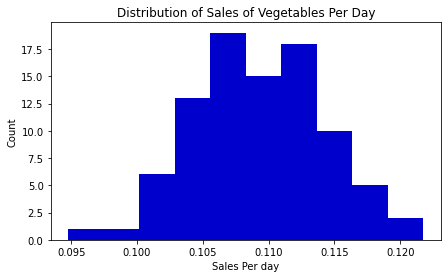

In [4]:
def sales_data_veg():
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(df.Vegetables, color='mediumblue')
    
    ax.set(xlabel = "Sales Per day",
           ylabel = "Count",
           title = "Distribution of Sales of Vegetables Per Day")
    
sales_data_veg()

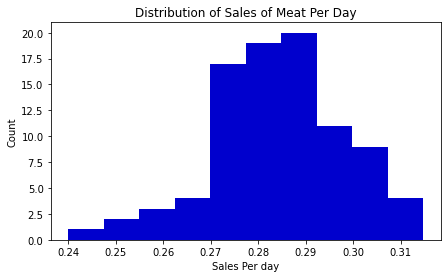

In [5]:
def sales_data_meat():
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(df.Meat, color='mediumblue')
    
    ax.set(xlabel = "Sales Per day",
           ylabel = "Count",
           title = "Distribution of Sales of Meat Per Day")
    
sales_data_meat()

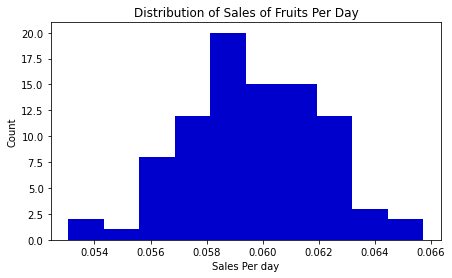

In [6]:
def sales_data_fruits():
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(df.Fruits, color='mediumblue')
    
    ax.set(xlabel = "Sales Per day",
           ylabel = "Count",
           title = "Distribution of Sales of Fruits Per Day")
    
sales_data_fruits()

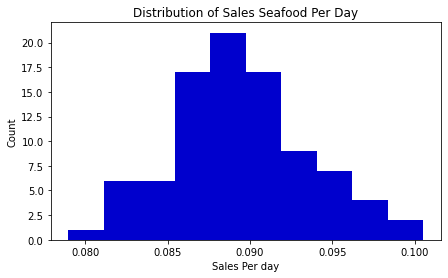

In [7]:
def sales_data_seafood():
    fig, ax = plt.subplots(figsize=(7,4))
    plt.hist(df.Seafood, color='mediumblue')
    
    ax.set(xlabel = "Sales Per day",
           ylabel = "Count",
           title = "Distribution of Sales Seafood Per Day")
    
sales_data_seafood()

In [8]:
prod_list=['Vegetables','Meat','Fruits','Seafood']
results = df[prod_list].sum(axis=0)
print(results)

Vegetables     9.857877
Meat          25.575442
Fruits         5.373000
Seafood        8.047648
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

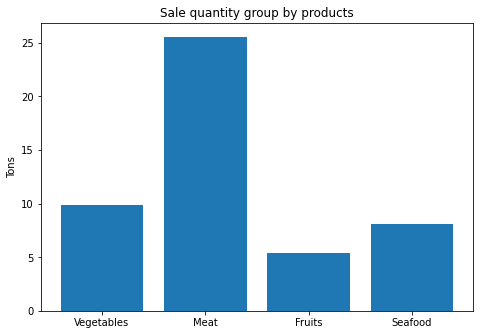

In [9]:
fig=plt.figure()
bg = fig.add_axes([0,0,1,1])
bg.bar(prod_list, results)
bg.set_ylabel('Tons')
bg.set_title('Sale quantity group by products')
plt.show

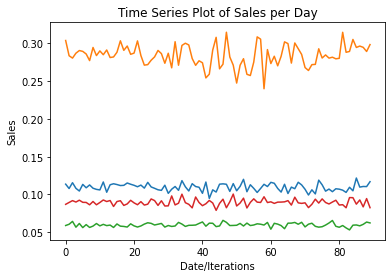

In [10]:
# Plot

plt.plot(df.Vegetables)
plt.plot(df.Meat)
plt.plot(df.Fruits)
plt.plot(df.Seafood)

# Labelling 

plt.xlabel("Date/Iterations")
plt.ylabel("Sales")
plt.title("Time Series Plot of Sales per Day")

# Display

plt.show()

# Seasonal decomposition for Forecasting Model

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
dfV = df.drop(df.columns[[2,3,4]], axis=1)
dfM = df.drop(df.columns[[1,3,4]], axis=1)
dfF = df.drop(df.columns[[1,2,4]], axis=1)
dfS = df.drop(df.columns[[1,2,3]], axis=1)



dfV.set_index('Date', inplace=True)
dfM.set_index('Date', inplace=True)
dfF.set_index('Date', inplace=True)
dfS.set_index('Date', inplace=True)

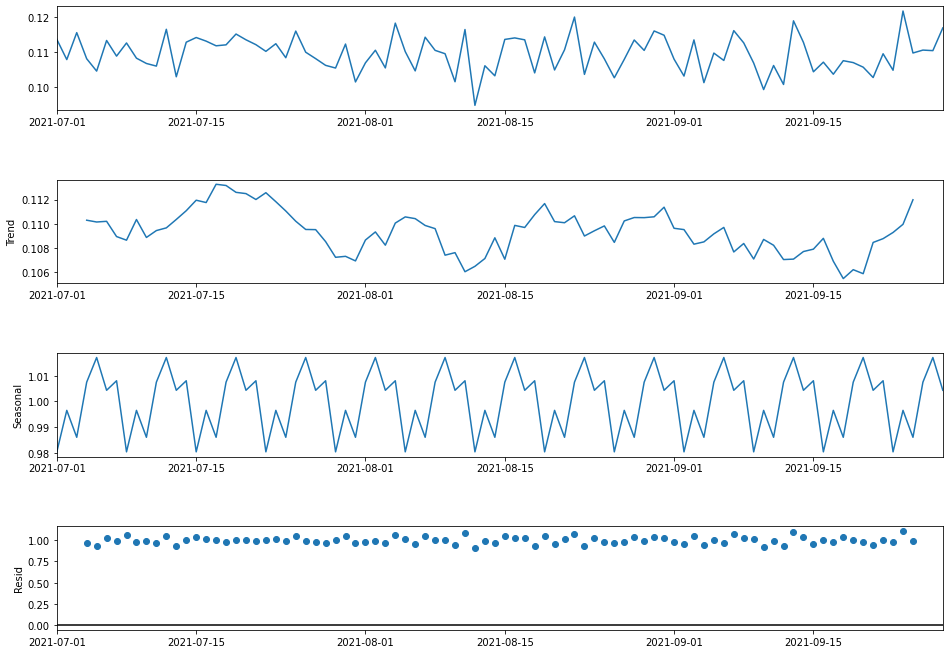

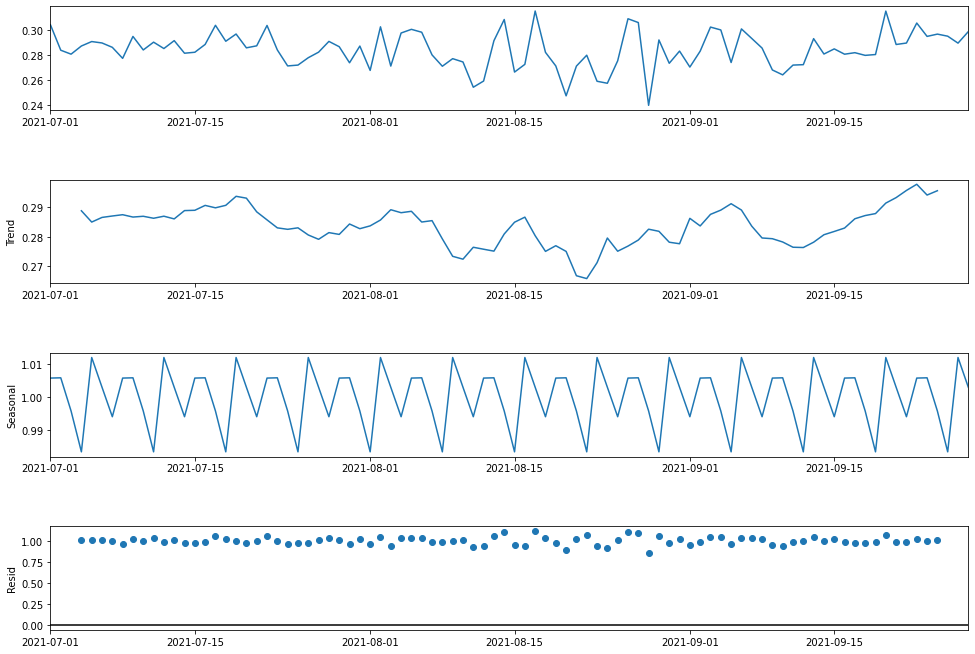

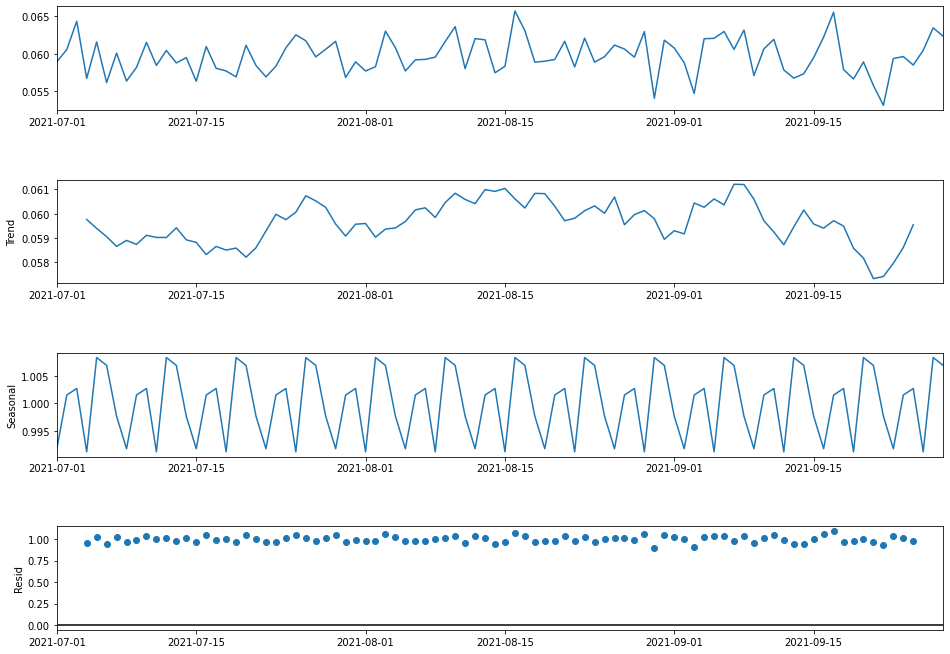

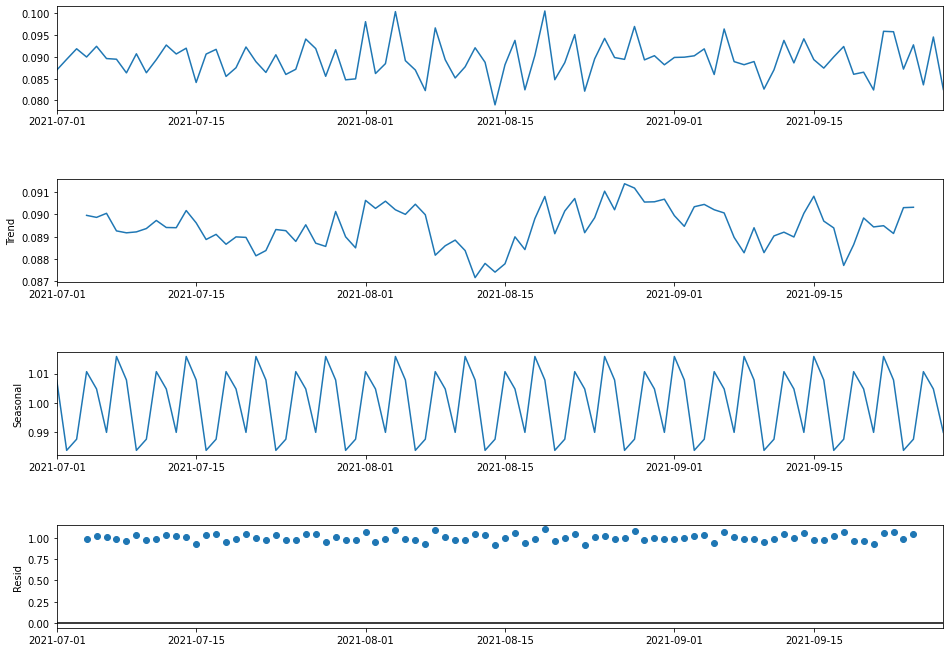

In [13]:
a=seasonal_decompose(dfV, model='multiplicative').plot()
b=seasonal_decompose(dfM, model='multiplicative').plot()
c=seasonal_decompose(dfF, model='multiplicative').plot()
d=seasonal_decompose(dfS, model='multiplicative').plot()
a.set_figheight(10)
a.set_figwidth(15)
b.set_figheight(10)
b.set_figwidth(15)
c.set_figheight(10)
c.set_figwidth(15)
d.set_figheight(10)
d.set_figwidth(15)

# Adfuller test

In [14]:
from statsmodels.tsa.stattools import adfuller

In [15]:
# ADF Test for Vegetables
result = adfuller(dfV, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -10.39327467503833
n_lags: 0
p-value: 1.995195292251891e-18
Critial Values:
   1%, -3.506057133647011
Critial Values:
   5%, -2.8946066061911946
Critial Values:
   10%, -2.5844100201994697


In [16]:
# ADF Test for Meat
result = adfuller(dfM, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -2.3027456809582314
n_lags: 7
p-value: 0.17108396390056352
Critial Values:
   1%, -3.512738056978279
Critial Values:
   5%, -2.8974898650628984
Critial Values:
   10%, -2.585948732897085


In [17]:
# ADF Test for Fruits
result = adfuller(dfF, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -3.8261738616825567
n_lags: 6
p-value: 0.002650592337267802
Critial Values:
   1%, -3.5117123057187376
Critial Values:
   5%, -2.8970475206326833
Critial Values:
   10%, -2.5857126912469153


In [18]:
# ADF Test for Seafood
result = adfuller(dfS, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -10.16043079618001
n_lags: 1
p-value: 7.533161662299776e-18
Critial Values:
   1%, -3.506944401824286
Critial Values:
   5%, -2.894989819214876
Critial Values:
   10%, -2.584614550619835


# Sale quantity Difference of Meat

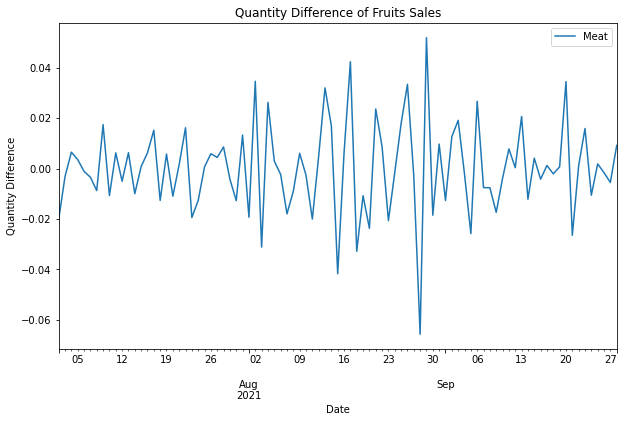

In [19]:
dfM1=dfM.diff().dropna()
dfM1plot = dfM1.plot(legend=True, label='Train', title='Quantity Difference of Fruits Sales',ylabel='Quantity Difference', figsize=(10,6))

# ARIMA Forecasting Model

In [20]:
trainV= df.Vegetables[:61]
trainM= df.Meat[:61]
trainF= df.Fruits[:61]
trainS= df.Seafood[:61]

In [21]:
testV= df.Vegetables[60:]
testM= df.Meat[60:]
testF= df.Fruits[60:]
testS= df.Seafood[60:]

## Determining PDQ 

In [22]:
import pmdarima as pm
# fitting a stepwise model:
stepwise_fit = pm.auto_arima(dfV, start_p=1, start_q=1, max_p=3, max_q=3, m=3,
                             start_P=0, seasonal=False, d=1, D=1, trace=True,
                             error_action='ignore', 
                             suppress_warnings=True,  
                             stepwise=True)  
stepwise_fit.summary()

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (3) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-666.430, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-613.880, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-652.440, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-671.022, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-615.878, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-668.551, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-671.070, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-670.814, Time=0.53 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-676.496, Time=0.45 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,1,3)(0,0,0)[0] intercept
Total fit time: 3.313 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   90
Model:               SARIMAX(0, 1, 3)   Log Likelihood                 343.248
Date:                Fri, 10 Jun 2022   AIC                           -676.496
Time:                        10:14:48   BIC                           -664.053
Sample:                             0   HQIC                          -671.481
                                 - 90                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.405e-05   2.63e-05     -0.913      0.361   -7.57e-05    2.76e-05
ma.L1         -1.0716      0.219     -4.896      0.000      -1.501      -0.643
ma.L2          0.3022      0.147      2.051      0.040       0.013       0.591
ma.L3         -0.2179      0.130     -1.675      0.094      -0.473       0.037
sigma2      2.503e-05   7.28e-06      3.436      0.001    1.08e-05    3.93e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.49
Prob(Q):                              0.89   Prob(JB):                         0.78
Heteroskedasticity (H):               2.15   Skew:                             0.13
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
import pmdarima as pm
# fitting a stepwise model:
stepwise_fit = pm.auto_arima(dfM, start_p=1, start_q=1, max_p=3, max_q=3, m=3,
                             start_P=0, seasonal=False, d=1, D=1, trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, 
                             stepwise=True) 

stepwise_fit.summary()

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (3) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-495.154, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-457.221, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-468.296, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-495.728, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-459.220, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-492.595, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-492.975, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-497.692, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-497.141, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-497.464, Time=0.43 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-470.296, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-495.570, Time=0.35 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.179 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   90
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 250.846
Date:                Fri, 10 Jun 2022   AIC                           -497.692
Time:                        10:14:51   BIC                           -492.715
Sample:                             0   HQIC                          -495.686
                                 - 90                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9013      0.052    -17.213      0.000      -1.004      -0.799
sigma2         0.0002   2.93e-05      6.980      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.27   Jarque-Bera (JB):                 0.92
Prob(Q):                              0.26   Prob(JB):                         0.63
Heteroskedasticity (H):               2.08   Skew:                             0.12
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
import pmdarima as pm
# fitting a stepwise model:
stepwise_fit = pm.auto_arima(dfF, start_p=1, start_q=1, max_p=3, max_q=3, m=3,
                             start_P=0, seasonal=False, d=1, D=1, trace=True,
                             error_action='ignore',  
                             suppress_warnings=True,  
                             stepwise=True)  

stepwise_fit.summary()

Performing stepwise search to minimize aic


c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (3) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-794.941, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-755.505, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-773.957, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-793.572, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-757.494, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-798.783, Time=0.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-782.097, Time=0.18 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-787.598, Time=0.27 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-790.391, Time=0.90 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-801.887, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-794.883, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-795.630, Time=0.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-795.578, Time=0.83 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-781.887, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.45 sec

Best model:  A

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   90
Model:               SARIMAX(1, 1, 2)   Log Likelihood                 405.944
Date:                Fri, 10 Jun 2022   AIC                           -801.887
Time:                        10:14:56   BIC                           -789.444
Sample:                             0   HQIC                          -796.872
                                 - 90                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.146e-06   3.91e-05      0.106      0.916   -7.25e-05    8.08e-05
ar.L1         -0.8015     13.002     -0.062      0.951     -26.284      24.681
ma.L1         -0.1878     13.065     -0.014      0.989     -25.795      25.419
ma.L2         -0.7896     12.907     -0.061      0.951     -26.086      24.507
sigma2      6.121e-06   1.04e-06      5.881      0.000    4.08e-06    8.16e-06
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.63   Prob(JB):                         0.80
Heteroskedasticity (H):               2.04   Skew:                            -0.17
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
import pmdarima as pm
# fitting a stepwise model:
stepwise_fit = pm.auto_arima(dfS, start_p=1, start_q=1, max_p=3, max_q=3, m=3,
                             start_P=0, seasonal=False, d=1, D=1, trace=True,
                             error_action='ignore',  
                             suppress_warnings=True,  
                             stepwise=True)  

stepwise_fit.summary()

Performing stepwise search to minimize aic


c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (3) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-706.596, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-640.364, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-662.456, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-711.164, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-642.359, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-678.408, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-698.443, Time=0.55 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-713.191, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-664.455, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.53 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.674 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   90
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 358.596
Date:                Fri, 10 Jun 2022   AIC                           -713.191
Time:                        10:14:59   BIC                           -708.214
Sample:                             0   HQIC                          -711.185
                                 - 90                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9488      0.112     -8.456      0.000      -1.169      -0.729
sigma2      1.802e-05   3.11e-06      5.797      0.000    1.19e-05    2.41e-05
===================================================================================
Ljung-Box (L1) (Q):                   5.21   Jarque-Bera (JB):                 1.50
Prob(Q):                              0.02   Prob(JB):                         0.47
Heteroskedasticity (H):               1.94   Skew:                             0.30
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Model Fitting and Forecasting

In [27]:
modelV=SARIMAX(testV,order=(0,2,3)).fit()
modelM=SARIMAX(testM,order=(0,1,1)).fit()
modelF=SARIMAX(testF,order=(1,1,2)).fit()
modelS=SARIMAX(testS,order=(0,1,1)).fit()

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to conve

In [65]:
forecastV=modelV.get_prediction(start=-28)
forecastM=modelM.get_prediction(start=-29)
forecastF=modelF.get_prediction(start=-29)
forecastS=modelS.get_prediction(start=-29)

In [66]:
meanfcV=forecastV.predicted_mean
meanfcM=forecastM.predicted_mean
meanfcF=forecastF.predicted_mean
meanfcS=forecastS.predicted_mean
meanfcV, meanfcM, meanfcF, meanfcS

(62    0.113611
 63    0.105215
 64    0.097733
 65    0.110265
 66    0.106016
 67    0.103271
 68    0.107459
 69    0.117563
 70    0.116617
 71    0.103271
 72    0.092206
 73    0.102237
 74    0.106664
 75    0.117868
 76    0.119214
 77    0.101217
 78    0.098218
 79    0.105674
 80    0.109853
 81    0.107584
 82    0.103644
 83    0.100964
 84    0.108499
 85    0.109013
 86    0.120093
 87    0.116838
 88    0.105192
 89    0.106761
 Name: predicted_mean, dtype: float64,
 61    0.273344
 62    0.278531
 63    0.275184
 64    0.277995
 65    0.286189
 66    0.290695
 67    0.285217
 68    0.290229
 69    0.291142
 70    0.289285
 71    0.282397
 72    0.276484
 73    0.275002
 74    0.274109
 75    0.280194
 76    0.280354
 77    0.281783
 78    0.281385
 79    0.281503
 80    0.280895
 81    0.280698
 82    0.291730
 83    0.290602
 84    0.290212
 85    0.295091
 86    0.294954
 87    0.295450
 88    0.295252
 89    0.293332
 Name: predicted_mean, dtype: float64,
 61    0.0

In [67]:
ciV=forecastV.conf_int()
ciM=forecastM.conf_int()
ciF=forecastF.conf_int()
ciS=forecastS.conf_int()

## Forecasting plots

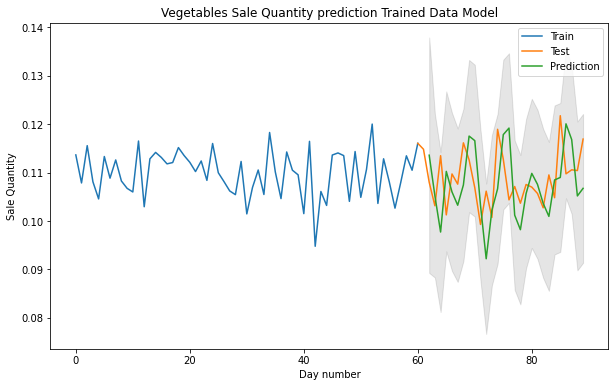

In [68]:
trainV.plot(legend=True, label='Train', ylabel='Sale Quantity', xlabel='Day number',title='Vegetables Sale Quantity prediction Trained Data Model',figsize=(10,6))
testV.plot(legend=True, label='Test')
meanfcV.plot(legend=True, label='Prediction')
plt.fill_between(ciV.index,
                ciV.iloc[:, 0],
                ciV.iloc[:, 1], color='k', alpha=.1)

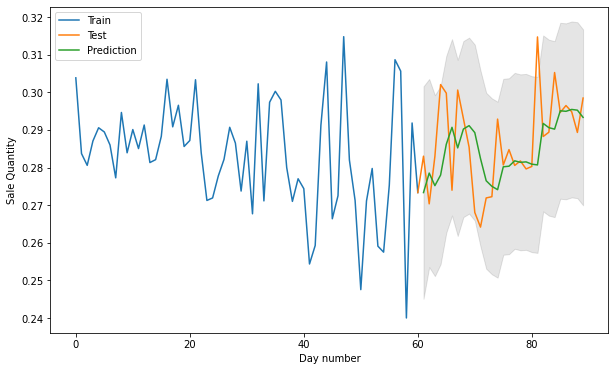

In [69]:
trainM.plot(legend=True, label='Train',  ylabel='Sale Quantity', xlabel='Day number',figsize=(10,6))
testM.plot(legend=True, label='Test')
meanfcM.plot(legend=True, label='Prediction')
plt.fill_between(ciM.index,
                ciM.iloc[:, 0],
                ciM.iloc[:, 1], color='k', alpha=.1)

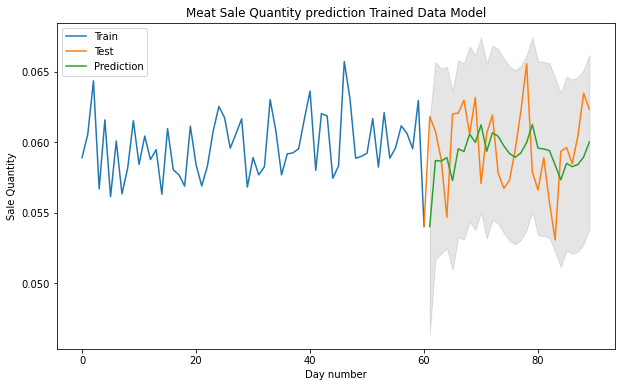

In [70]:
trainF.plot(legend=True, label='Train', ylabel='Sale Quantity', xlabel='Day number',title='Meat Sale Quantity prediction Trained Data Model', figsize=(10,6))
testF.plot(legend=True, label='Test')
meanfcF.plot(legend=True, label='Prediction')
plt.fill_between(ciF.index,
                ciF.iloc[:, 0],
                ciF.iloc[:, 1], color='k', alpha=.1)

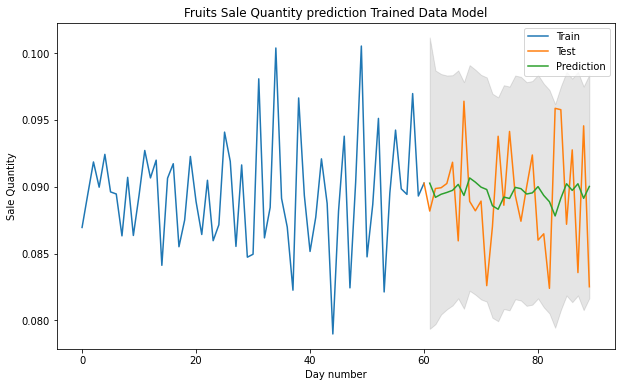

In [71]:
trainS.plot(legend=True, label='Train',ylabel='Sale Quantity', xlabel='Day number',title='Fruits Sale Quantity prediction Trained Data Model', figsize=(10,6))
testS.plot(legend=True, label='Test')
meanfcS.plot(legend=True, label='Prediction')
plt.fill_between(ciS.index,
                ciS.iloc[:, 0],
                ciS.iloc[:, 1], color='k', alpha=.1)

# Exponential Smoothing Forecasting Model

In [8]:
prod_list=['Vegetables','Meat','Fruits','Seafood']
results = df[prod_list].sum(axis=0)
print(results)

Vegetables     9.857877
Meat          25.575442
Fruits         5.373000
Seafood        8.047648
dtype: float64


In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [36]:
hwV=ExponentialSmoothing(trainV,trend='mul',seasonal='mul',seasonal_periods=30).fit()
predV1=hwV.forecast(30)

<AxesSubplot:title={'center':'Vegtables Sale Quantity prediction Trained Data Model'}, xlabel='Day number', ylabel='Sale Quantity'>

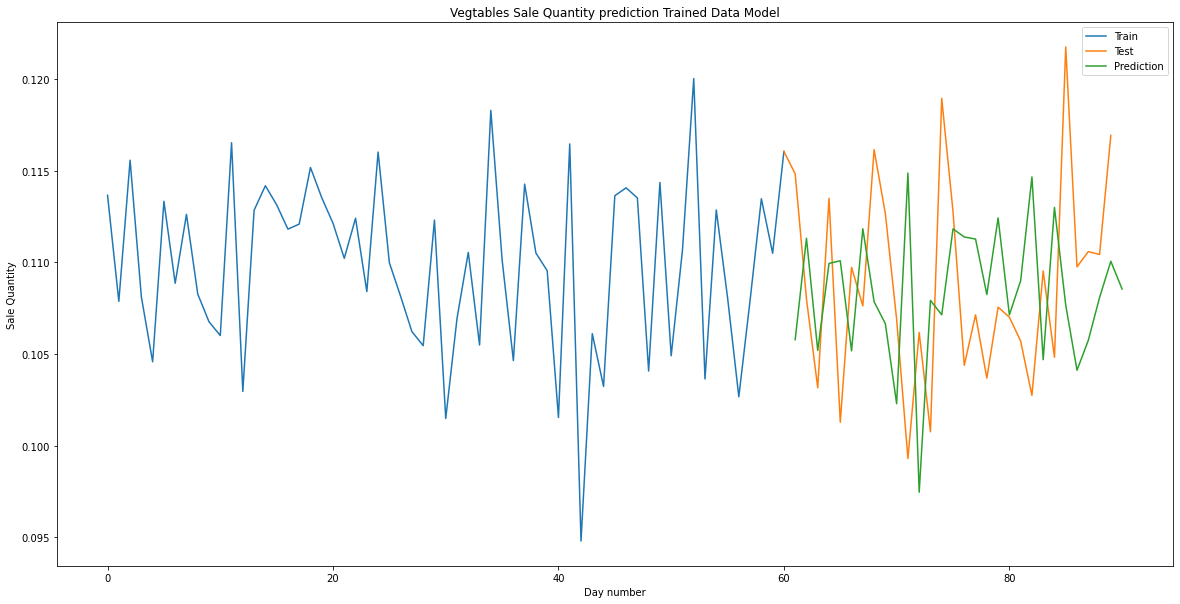

In [37]:
trainV.plot(legend=True, label='Train', ylabel='Sale Quantity', xlabel='Day number',title='Vegtables Sale Quantity prediction Trained Data Model', figsize=(20,10))
testV.plot(legend=True, label='Test')
predV1.plot(legend=True, label='Prediction')

In [38]:
hwM=ExponentialSmoothing(trainM,trend='mul',seasonal='mul',seasonal_periods=30).fit()
predM1=hwM.forecast(30)
predM1

61    0.265279
62    0.280023
63    0.268512
64    0.282593
65    0.283415
66    0.280630
67    0.267870
68    0.272097
69    0.269705
70    0.271474
71    0.259547
72    0.264940
73    0.275102
74    0.283426
75    0.266700
76    0.276976
77    0.290966
78    0.278137
79    0.267694
80    0.257199
81    0.276274
82    0.270916
83    0.254939
84    0.254512
85    0.265807
86    0.283773
87    0.286495
88    0.253280
89    0.271685
90    0.273509
dtype: float64

<AxesSubplot:title={'center':'Meat Sale Quantity prediction Trained Data Model'}, xlabel='Day number', ylabel='Sale Quantity'>

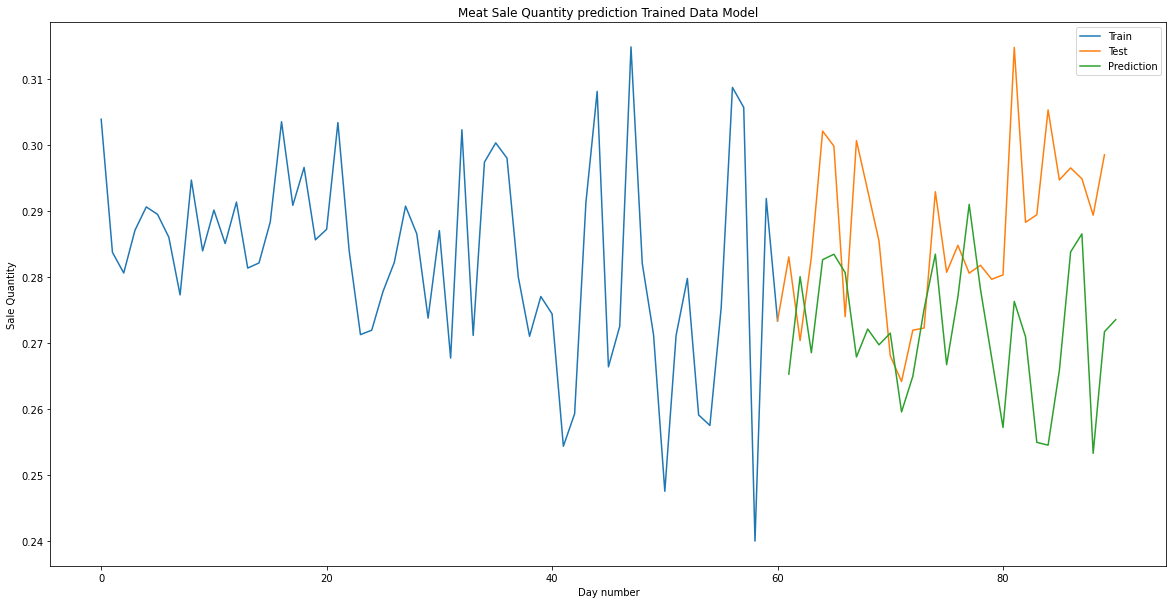

In [39]:
trainM.plot(legend=True, label='Train',ylabel='Sale Quantity', xlabel='Day number',title='Meat Sale Quantity prediction Trained Data Model', figsize=(20,10))
testM.plot(legend=True, label='Test')
predM1.plot(legend=True, label='Prediction')

In [40]:
hwF=ExponentialSmoothing(trainF,trend='mul',seasonal='mul',seasonal_periods=30).fit()
predF1=hwF.forecast(30)
predF1

61    0.058066
62    0.058446
63    0.063111
64    0.060906
65    0.057813
66    0.059228
67    0.059238
68    0.059531
69    0.061683
70    0.063789
71    0.058172
72    0.062193
73    0.062088
74    0.057594
75    0.062002
76    0.059096
77    0.058891
78    0.058088
79    0.062343
80    0.059569
81    0.058025
82    0.059459
83    0.061911
84    0.063684
85    0.062799
86    0.060563
87    0.061598
88    0.062595
89    0.057636
90    0.059800
dtype: float64

<AxesSubplot:title={'center':'Frutis Sale Quantity prediction Trained Data Model'}, xlabel='Day number', ylabel='Sale Quantity'>

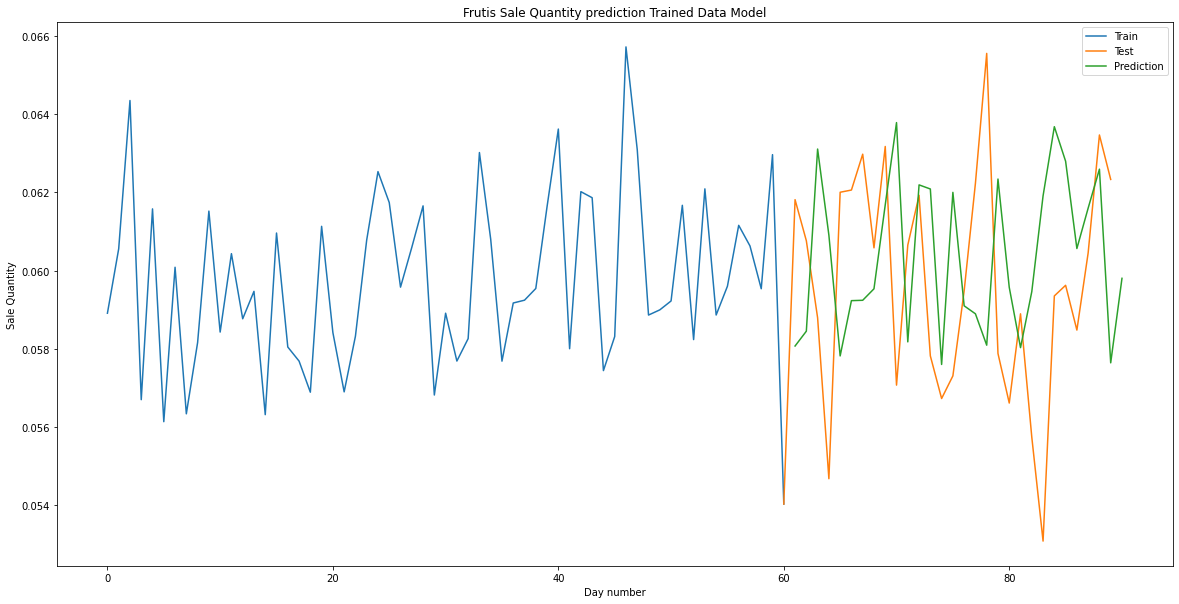

In [41]:
trainF.plot(legend=True, label='Train', ylabel='Sale Quantity', xlabel='Day number',title='Frutis Sale Quantity prediction Trained Data Model', figsize=(20,10))
testF.plot(legend=True, label='Test')
predF1.plot(legend=True, label='Prediction')

In [42]:
hwS=ExponentialSmoothing(trainS,trend='mul',seasonal='mul',seasonal_periods=30).fit()
predS1=hwS.forecast(30)
predS1

61    0.095372
62    0.090302
63    0.090560
64    0.098005
65    0.090717
66    0.089509
67    0.085488
68    0.095146
69    0.089180
70    0.088473
71    0.091457
72    0.092704
73    0.091614
74    0.082640
75    0.090683
76    0.094033
77    0.085145
78    0.090126
79    0.097678
80    0.088006
81    0.088712
82    0.094020
83    0.085160
84    0.089492
85    0.095381
86    0.092042
87    0.088591
88    0.095490
89    0.088107
90    0.089765
dtype: float64

<AxesSubplot:title={'center':'Seafood Sale Quantity prediction Trained Data Model'}, xlabel='Day number', ylabel='Sale Quantity'>

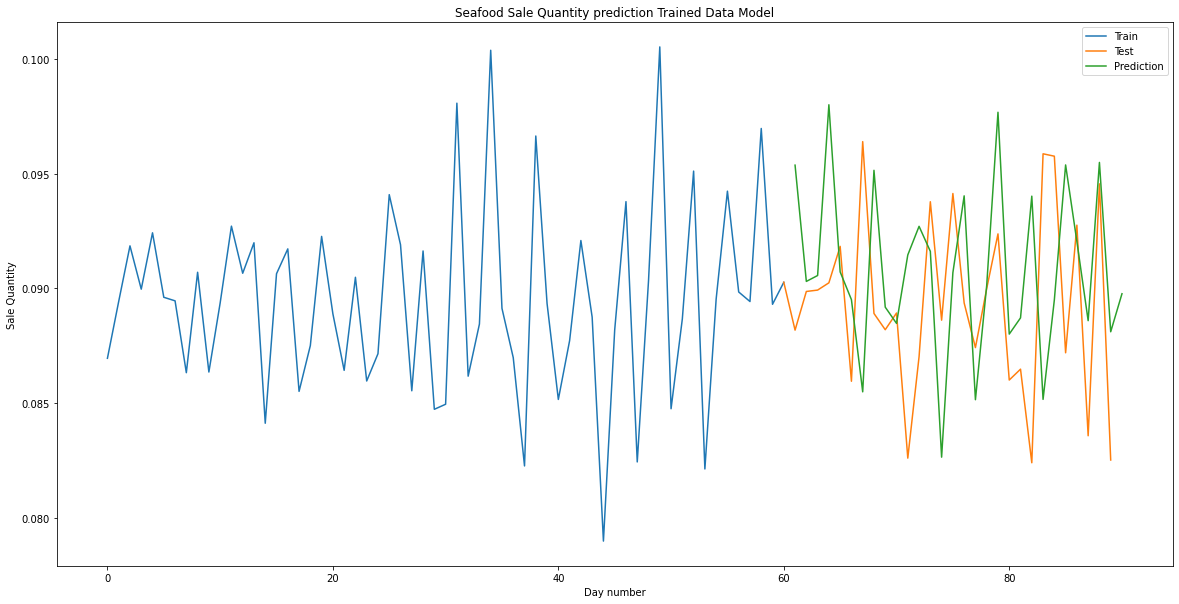

In [43]:
trainS.plot(legend=True, label='Train',ylabel='Sale Quantity', xlabel='Day number',title='Seafood Sale Quantity prediction Trained Data Model', figsize=(20,10))
testS.plot(legend=True, label='Test')
predS1.plot(legend=True, label='Prediction')

## Model Evaluation

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
eV=np.sqrt(mean_squared_error(testV,predV1))
eM=np.sqrt(mean_squared_error(testM,predM1))
eF=np.sqrt(mean_squared_error(testF,predF1))
eS=np.sqrt(mean_squared_error(testS,predS1))
eV, eM, eF, eS

(0.0063338643975806306,
 0.02060146317279709,
 0.003479039414572456,
 0.005338451680652012)

In [46]:
eV1=dfV.mean(), np.sqrt(dfV.var())
eV2=dfM.mean(), np.sqrt(dfM.var())
eV3=dfF.mean(), np.sqrt(dfF.var())
eV4=dfS.mean(), np.sqrt(dfS.var())
eV1, eV2, eV3, eV4

((Vegetables    0.109532
  dtype: float64,
  Vegetables    0.005076
  dtype: float64),
 (Meat    0.284172
  dtype: float64,
  Meat    0.014274
  dtype: float64),
 (Fruits    0.0597
  dtype: float64,
  Fruits    0.002467
  dtype: float64),
 (Seafood    0.089418
  dtype: float64,
  Seafood    0.004148
  dtype: float64))

# Final Forecasting Model

In [47]:
finV=ExponentialSmoothing(dfV,trend='mul',seasonal='mul',seasonal_periods=30).fit()
pred_finV=finV.forecast(7)
pred_finV

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2021-09-29    0.108773
2021-09-30    0.108255
2021-10-01    0.109764
2021-10-02    0.104048
2021-10-03    0.110452
2021-10-04    0.106696
2021-10-05    0.106159
Freq: D, dtype: float64

In [48]:
finM=ExponentialSmoothing(dfM,trend='mul',seasonal='mul',seasonal_periods=30).fit()
pred_finM=finM.forecast(7)
pred_finM

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2021-09-29    0.297293
2021-09-30    0.286788
2021-10-01    0.293439
2021-10-02    0.289057
2021-10-03    0.305828
2021-10-04    0.305706
2021-10-05    0.295024
Freq: D, dtype: float64

In [49]:
finF=ExponentialSmoothing(dfF,trend='mul',seasonal='mul',seasonal_periods=30).fit()
pred_finF=finF.forecast(7)
pred_finF

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2021-09-29    0.057418
2021-09-30    0.060177
2021-10-01    0.061280
2021-10-02    0.059666
2021-10-03    0.059165
2021-10-04    0.058771
2021-10-05    0.060605
Freq: D, dtype: float64

In [50]:
finS=ExponentialSmoothing(dfS,trend='mul',seasonal='mul',seasonal_periods=30).fit()
pred_finS=finS.forecast(7)
pred_finS

c:\users\ngoc nguyen\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2021-09-29    0.087660
2021-09-30    0.092164
2021-10-01    0.089566
2021-10-02    0.089723
2021-10-03    0.094638
2021-10-04    0.090479
2021-10-05    0.087737
Freq: D, dtype: float64

<AxesSubplot:title={'center':'Meat Sale Quantity Prediction Model'}, xlabel='Date', ylabel='Sale Quantity'>

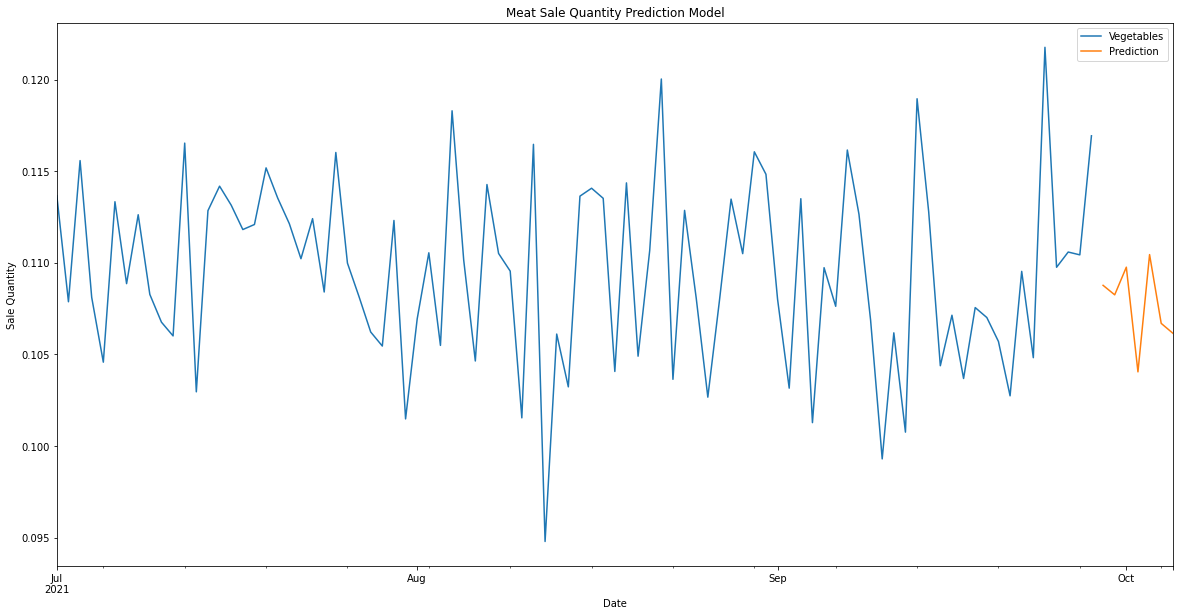

In [51]:
dfV.plot(legend=True, label='Past Sales Quantity',ylabel='Sale Quantity', xlabel='Date',title='Meat Sale Quantity Prediction Model', figsize=(20,10))
pred_finV.plot(legend=True, label='Prediction')

<AxesSubplot:title={'center':'Meat Sale Quantity Prediction Model'}, xlabel='Date', ylabel='Sale Quantity'>

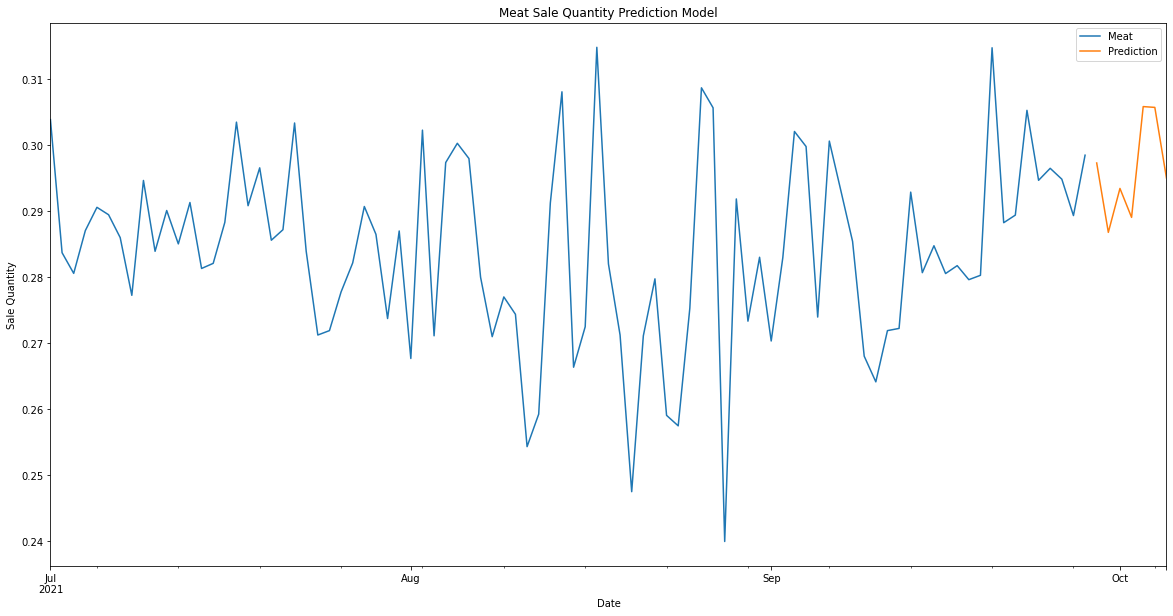

In [52]:
dfM.plot(legend=True, label='Past Meat Sales Quantity',ylabel='Sale Quantity', xlabel='Date',title='Meat Sale Quantity Prediction Model',figsize=(20,10))
pred_finM.plot(legend=True, label='Prediction')

<AxesSubplot:title={'center':'Fruits Sale Quantity Prediction Model'}, xlabel='Date', ylabel='Sale Quantity'>

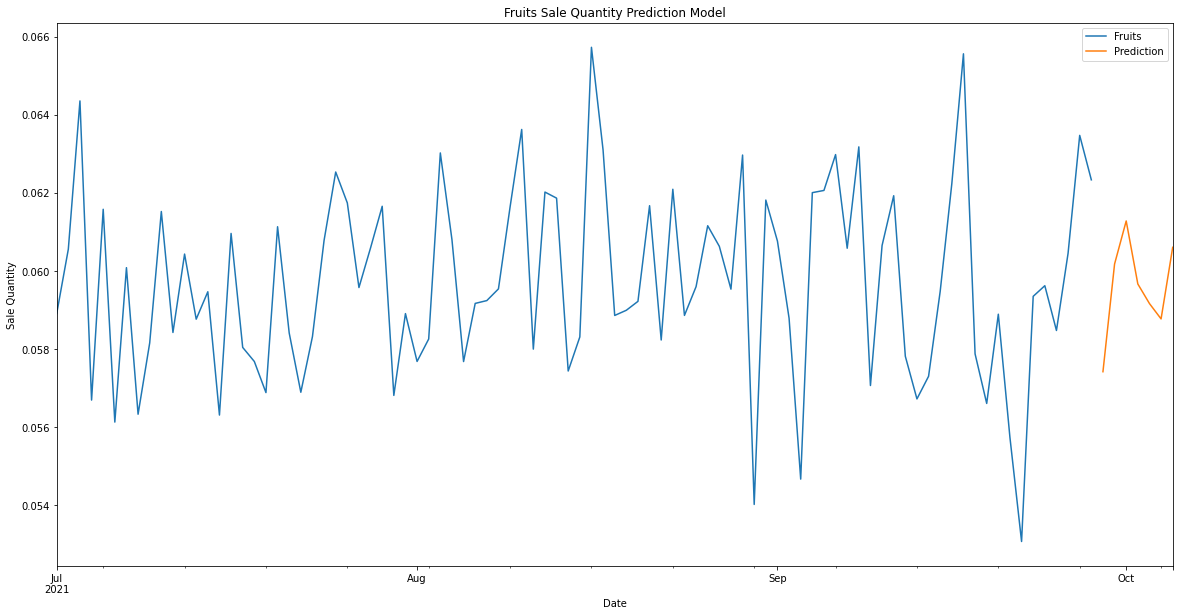

In [53]:
dfF.plot(legend=True, label='Past Fruits Sales Quantity',ylabel='Sale Quantity', xlabel='Date',title='Fruits Sale Quantity Prediction Model', figsize=(20,10))
pred_finF.plot(legend=True, label='Prediction')

<AxesSubplot:title={'center':'Seafood Sale Quantity Prediction Model'}, xlabel='Date', ylabel='Sale Quantity'>

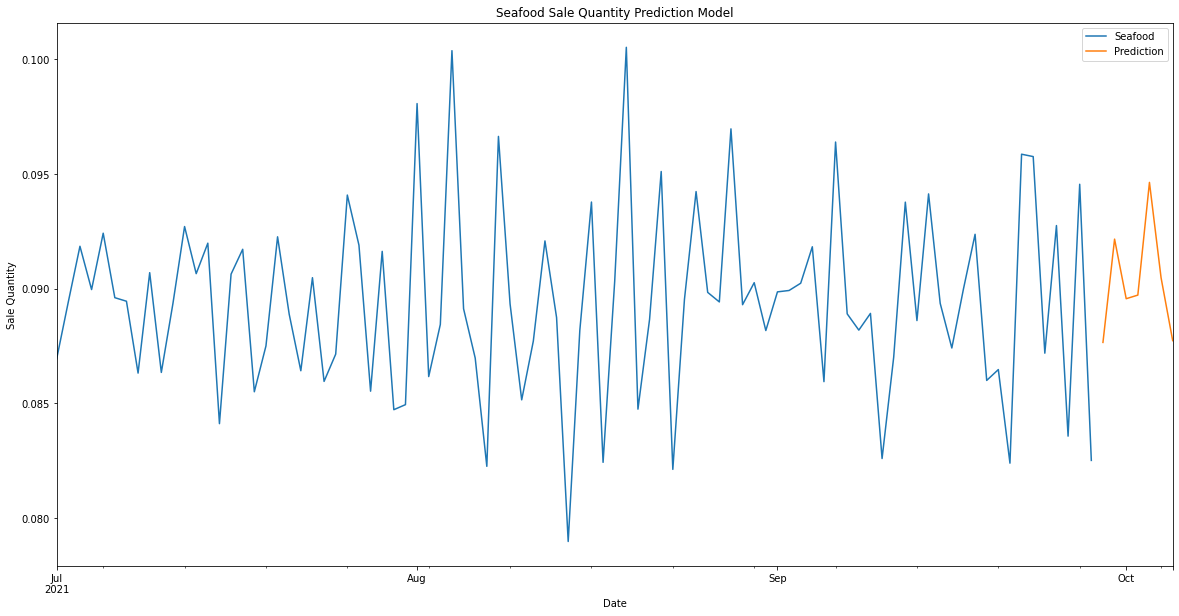

In [54]:
dfS.plot(legend=True, label='Past Seafood Sales Quantity', ylabel='Sale Quantity', xlabel='Date',title='Seafood Sale Quantity Prediction Model',figsize=(20,10))
pred_finS.plot(legend=True, label='Prediction')